In [1]:
from importlib import reload  # Python 3.4+

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

from tqdm import tqdm
from timeit import default_timer as timer
import itertools

### Load results

In [14]:
f_name = "16_06_2022_14_38_34semsparseT1000notp50.pkl" #verified data/semT1000.pkl"
with open(f_name, 'rb') as f:
    results = pickle.load(f)
print(results)
# print(data);

{'rw_2': {'mse': [4.901735524735939, 5.031988197085192, 4.8017471999735575, 5.017834365170509, 4.943796402526147, 5.097508133912994, 4.900260440935289, 5.211346039213539, 5.108904502474678, 5.185459374794773, 14.504288419901373, 11.160565188290613, 12.88282679199922, 10.85579063594429, 12.492968989695784, 12.747415158162298, 10.921968559520103, 13.91221435371905, 12.572306556891013, 10.972730525245261, 21.281575243805694, 23.73399779885836, 23.43056482234434, 23.54479029453851, 25.43950057941694, 27.383217829526252, 22.88233543022163, 22.435904984472604, 31.87306976096341, 19.97261403713902, 48.16859184178598, 53.06868827233942, 49.39232152380333, 41.083198722349174, 41.74208326113368, 47.77327698642041, 55.31692543354247, 42.171820833326166, 42.652791678994866, 40.80937561667552], 'emse': [5.014743813459439, 5.024860330178756, 5.007907439236677, 5.007186196964739, 5.005395464230281, 5.006091228988651, 5.003953980086766, 5.006384832109921, 5.0136257267371365, 5.014872612080228, 17.1633

### Save results

In [128]:
# from datetime import datetime

# a_file = open(f"{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}cyclicT100.pkl", "wb")
# pickle.dump(results, a_file)
# a_file.close()

### Print results

In [126]:
# print(results['dagols'])
# print(results_2['dagols'])

# results['dagols'] = results_2['dagols']

In [15]:
for method in results:
    if len(results[method]['mse']) >= 0:
        print(method)
        for metric in results[method]:
            print(metric, end = "\t")
            print([np.round(np.mean(results[method][metric][10*i:10*i + 10]), 2) for i in range(6)])
        print()

rw_2
mse	[5.02, 12.3, 24.2, 46.22, nan, nan]
emse	[5.01, 14.08, 30.09, 54.89, nan, nan]
shd	[0.0, 12.5, 37.9, 87.4, nan, nan]

mcmc_r
mse	[5.02, 11.73, 23.18, 48.07, nan, nan]
emse	[5.01, 12.13, 25.31, 58.9, nan, nan]
shd	[0.0, 10.7, 42.3, 95.8, nan, nan]

mcmc_g
mse	[5.02, 9.93, 14.91, 24.7, nan, nan]
emse	[5.01, 10.03, 15.04, 25.11, nan, nan]
shd	[0.0, 0.0, 0.0, 1.0, nan, nan]

notears
mse	[5.07, 11.86, 326.3, 32.91, nan, nan]
emse	[5.06, 10.44, 22.55, 28.38, nan, nan]
shd	[1.2, 3.6, 6.6, 9.9, nan, nan]

dagomp
mse	[5.87, 14.12, 18.24, 30.16, nan, nan]
emse	[5.95, 15.35, 19.08, 33.74, nan, nan]
shd	[2.6, 15.4, 25.2, 39.0, nan, nan]

dagols
mse	[7.1, 34.19, 96.83, 191.95, nan, nan]
emse	[7.11, 34.43, 98.66, 194.27, nan, nan]
shd	[1.4, 15.8, 29.5, 50.5, nan, nan]



### Plot results

In [25]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})

matplotlib.rcParams['axes.unicode_minus'] = False

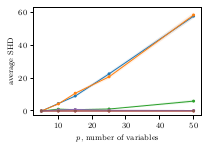

In [153]:
plt.figure(figsize = (3.0, 2.0))
plt.xlabel("$p$, number of variables")

p_range = [5, 10, 15, 25, 50]

# plt.ylabel("average empirical risk " + r"$R_{\mathrm{emp}}(W)$")
# plt.ylabel("average true risk " + r"$R(W)$")
plt.ylabel("average SHD$")

def plot_results(method, metric, results, method_name, linestyle = '-'):
    # plot mean and standard error of DAG-OMP as a function of p.
    plt.plot(p_range, [np.mean(results[method][metric][10*i:10*i + 10]) for i in range(5)], marker = 'o', markersize = 2, linewidth = 1, label = method_name, linestyle = linestyle)
    plt.fill_between(p_range, [np.mean(results[method][metric][10*i:10*i + 10]) - sem(results[method][metric][10*i:10*i + 10])for i in range(5)], [np.mean(results[method][metric][10*i:10*i + 10]) + sem(results[method][metric][10*i:10*i + 10])for i in range(5)], alpha = 0.1)

metric = "shd"

plot_results("rw_2", metric, results, "Random Walk")
plot_results("mcmc_r", metric, results, "MH-R")
plot_results("mcmc_g", metric, results, "MH-G")

plot_results("notears", metric, results, "NO TEARS")
plot_results("dagomp", metric, results, "DAG-OMP")
plot_results("dagols", metric, results, "DAG-OLS-V")

# plot_results("daglasso", metric, results, "DAG-LASSO") # yields too large error


# plt.legend(ncol = 6, loc = 'upper left', bbox_to_anchor=(-0.025, 1.2), columnspacing = 0.75, handletextpad = 0.25)
plt.savefig("sparseT1000shd2.pgf", bbox_inches = 'tight')